<a href="https://colab.research.google.com/github/Samdatascienti/Samdatascienti/blob/main/bike_model_bikeshare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# as usual, let us load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library
from google.colab import files
import seaborn as sns
from matplotlib import pyplot as plt

# below sklearn libraries for different models
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')  

Mounted at /content/gdrive


In [ ]:
path="/content/gdrive/MyDrive/data/Bike/Copy of BIKE-SHARING SURVEY (réponses).xlsx"
df=pd.read_excel(path)
df.head()

,gender,age,education,occupation,have_car,have_motobike,have_bicycle,have_car2,have_moto2,have_bicycle2,ride_bike,encrg_grn_trvel,cost_1km,bike_type_pref,checkinout,income_hh,reason_work,reason_school,reason_bus,reason_shop,reason_exercise,other_reason,not_ride_no_parking,not_ride_no_lanes,not_ride_poor_condition,not_ride_unsafe_intersct,not_ride_bad_driver,not_ride_sft_concn,not_ride_notime,not_ride_toofar,improv_bike_lanes,impr_conn_bike_busstop,impr_bett_inters,impr_bett_light,impr_sep_vehicle,impr_showers,impr_bike_road_map,conv_reas_ride,why_to_use_bicycle,ride_lanes_avail,walk_cycl_lanes_avail,home_to_schl,school_to_bus,rate_tariff_300_10km,factor_bike_use,kind_trip_bike_use,reason_choose_bike_share,doyou_have,barrier_bike_share
0,Male,31-45,Tertiarry,Employed or Self employed,NaN,NaN,Yes,No,Yes,Yes,yes,Yes,200rwf,E-Bike,Yes,"Above 300,001 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Not a reason,Not a reason,Not a reason,Minor reason,Minor reason,Minor reason,Not a reason,Not a reason,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important,Very important,"Go to school, Exercise",Better for the environment,cycle,yes,NaN,less than 500m,tarrif is moderated,Type of bike,Fitness,To save time,Smart phone,Worried there might not be an available bike
1,Male,16-30,Tertiarry,Employed or Self employed,No,No,No,No,No,No,yes,Yes,500frw,Smart Bike,Yes,"Less than 100,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Minor reason,Not a reason,Major reason,Minor reason,Not a reason,Major reason,NaN,Major reason,Very important,Very important,Very important,Very important,Very important,Not sure,Not sure,"Go to work, Go to school, Get to and from a tr...",To save money,cycle,No,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is moderated,Price,Commuting to and from work,To make my journey easier,Smart phone,Smart phone too expensive
2,Male,16-30,Tertiarry,Employed or Self employed,No,Yes,No,No,No,No,yes,Yes,300,Smart Bike,Yes,"Between 100,001 – 200,000 rwf",NaN,NaN,Daily,Daily,Daily,NaN,Major reason,Major reason,NaN,Major reason,Major reason,NaN,NaN,NaN,Very important,Very important,Very important,Very important,Very important,NaN,Very important,"Go to work, Go shopping or to eat, Exercise",Better for the environment,cycle,yes,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is low,Price,Fitness,NaN,Smart phone,I just prefer to ride my own bike
3,Female,31-45,Tertiarry,Student,No,No,No,No,No,No,No,Yes,100 RWF,Smart Bike,Yes,"Less than 100,000 rwf",Daily,Daily,Daily,Daily,Daily,NaN,NaN,NaN,Major reason,Major reason,Major reason,NaN,NaN,Major reason,Very important,Very important,Very important,Very important,Somewhat important,Very important,Very important,"Go to work, Go to school, Get to and from a tr...",To save money,cycle,yes,less than 2km,less than 500m,tarrif is moderated,Price,Commuting to and from school,Getting to places not served by public transport,Smart phone,Smart phone too expensive
4,Male,16-30,Tertiarry,Student,No,No,No,Yes,Yes,Yes,yes,Yes,300 rfw,Smart Bike,No,"Less than 100,000 rwf",At least once a week,Daily,At least once a week,At least once a month,Daily,Daily,Major reason,Minor reason,Major reason,Minor reason,Major reason,Major reason,Not a reason,Not a reason,Very important,Very important,Very important,Very important,Very important,Very important,Very important,"Go to work, Go shopping or to eat, Exercise",To save money,cycle,No,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is moderated,Type of bike,Recreation,Avoid traffic congestion or car parking problems,Smart phone,Don’t know enough to use bike sharing


# *changing variable with mistakes*

In [ ]:
# changing the categories of means transport into few categories.
df["ride_lanes_avail"]=df["ride_lanes_avail"].replace({"cycle": "cycle", "use motorbike" :"motorbike", "cycle, use motorbike":"cycle", 
                                                       "walk":"walk","cycle, walk":"cycle","cycle, walk, use motorbike":"cycle",
                                                       "use bus":"bus","use private car":"private car",
                                                       "cycle, use bus, use private car, walk, use motorbike":"cycle","cycle, use bus, walk":"cycle",
                                                       "walk, use motorbike":"walk","use bus, use motorbike":"bus","cycle, use bus":"cycle",
                                                       "use bus, walk":"walk","cycle, use private car, walk":"cycle","bus or private car":"bus",
                                                       "cycle, use bus, use private car, walk":"cycle","cycle, use bus, walk, use motorbike":"cycle",
                                                       "cycle, use bus, use private car, use motorbike":"cycle","cycle, use private car, use motorbike":"cycle",
                                                       "use bus, walk, use motorbike":"walk","use private car, walk":"walk"})
# changing Smart bike to smart bike
df["bike_type_pref"]=df["bike_type_pref"].replace({"Smart Bike": "smart bike"})
# extracting numbers from text
df['cost_new']=df.cost_1km.str.extract('(\d+)')
# inserting value where was only number becomes NaN
df['cost_new'] = df['cost_new'].replace(np.nan, 0)
df.cost_new[df.cost_new == 0] = df.cost_1km
df.head()

,gender,age,education,occupation,have_car,have_motobike,have_bicycle,have_car2,have_moto2,have_bicycle2,ride_bike,encrg_grn_trvel,cost_1km,bike_type_pref,checkinout,income_hh,reason_work,reason_school,reason_bus,reason_shop,reason_exercise,other_reason,not_ride_no_parking,not_ride_no_lanes,not_ride_poor_condition,not_ride_unsafe_intersct,not_ride_bad_driver,not_ride_sft_concn,not_ride_notime,not_ride_toofar,improv_bike_lanes,impr_conn_bike_busstop,impr_bett_inters,impr_bett_light,impr_sep_vehicle,impr_showers,impr_bike_road_map,conv_reas_ride,why_to_use_bicycle,ride_lanes_avail,walk_cycl_lanes_avail,home_to_schl,school_to_bus,rate_tariff_300_10km,factor_bike_use,kind_trip_bike_use,reason_choose_bike_share,doyou_have,barrier_bike_share,cost_new
0,Male,31-45,Tertiarry,Employed or Self employed,NaN,NaN,Yes,No,Yes,Yes,yes,Yes,200rwf,E-Bike,Yes,"Above 300,001 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Not a reason,Not a reason,Not a reason,Minor reason,Minor reason,Minor reason,Not a reason,Not a reason,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important,Very important,"Go to school, Exercise",Better for the environment,cycle,yes,NaN,less than 500m,tarrif is moderated,Type of bike,Fitness,To save time,Smart phone,Worried there might not be an available bike,200
1,Male,16-30,Tertiarry,Employed or Self employed,No,No,No,No,No,No,yes,Yes,500frw,smart bike,Yes,"Less than 100,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Minor reason,Not a reason,Major reason,Minor reason,Not a reason,Major reason,NaN,Major reason,Very important,Very important,Very important,Very important,Very important,Not sure,Not sure,"Go to work, Go to school, Get to and from a tr...",To save money,cycle,No,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is moderated,Price,Commuting to and from work,To make my journey easier,Smart phone,Smart phone too expensive,500
2,Male,16-30,Tertiarry,Employed or Self employed,No,Yes,No,No,No,No,yes,Yes,300,smart bike,Yes,"Between 100,001 – 200,000 rwf",NaN,NaN,Daily,Daily,Daily,NaN,Major reason,Major reason,NaN,Major reason,Major reason,NaN,NaN,NaN,Very important,Very important,Very important,Very important,Very important,NaN,Very important,"Go to work, Go shopping or to eat, Exercise",Better for the environment,cycle,yes,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is low,Price,Fitness,NaN,Smart phone,I just prefer to ride my own bike,300
3,Female,31-45,Tertiarry,Student,No,No,No,No,No,No,No,Yes,100 RWF,smart bike,Yes,"Less than 100,000 rwf",Daily,Daily,Daily,Daily,Daily,NaN,NaN,NaN,Major reason,Major reason,Major reason,NaN,NaN,Major reason,Very important,Very important,Very important,Very important,Somewhat important,Very important,Very important,"Go to work, Go to school, Get to and from a tr...",To save money,cycle,yes,less than 2km,less than 500m,tarrif is moderated,Price,Commuting to and from school,Getting to places not served by public transport,Smart phone,Smart phone too expensive,100
4,Male,16-30,Tertiarry,Student,No,No,No,Yes,Yes,Yes,yes,Yes,300 rfw,smart bike,No,"Less than 100,000 rwf",At least once a week,Daily,At least once a week,At least once a month,Daily,Daily,Major reason,Minor reason,Major reason,Minor reason,Major reason,Major reason,Not a reason,Not a reason,Very important,Very important,Very important,Very important,Very important,Very important,Very important,"Go to work, Go shopping or to eat, Exercise",To save money,cycle,No,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is moderated,Type of bike,Recreation,Avoid traffic congestion or car parking problems,Smart phone,Don’t know enough to use bike sharing,300


In [ ]:
cost=df[['cost_1km','cost_new']]
cost.head()

,cost_1km,cost_new
0,200rwf,200
1,500frw,500
2,300,300
3,100 RWF,100
4,300 rfw,300


to set maximum 300

In [ ]:
# # Save submission file
# cost.to_csv('cost_bike.csv')
# files.download('cost_bike.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df["gender"]=df["gender"].replace({"Male": 0,"Female":1})
df["age"]=df["age"].replace({"16-30": 1,"31-45":2,"46 and Above":3})
df["education"]=df["education"].replace({"Secondary": 0,"Tertiarry":1})
df["occupation"]=df["occupation"].replace({"Student": 0,"Employed or Self employed":1})
df["have_car2"]=df["have_car2"].replace({"No": 0,"Yes":1})
df["have_motobike"]=df["have_motobike"].replace({"No": 0,"Yes":1})
df["have_bicycle"]=df["have_bicycle"].replace({"No": 0,"Yes":1})
df["ride_bike"]=df["ride_bike"].replace({"No": 0,"yes":1})
df["encrg_grn_trvel"]=df["encrg_grn_trvel"].replace({"No": 0,"Yes":1})
df["bike_type_pref"]=df["bike_type_pref"].replace({"smart bike": 0,"E-Bike":1,"Normal Bike":2,"Scooter":3})
df["checkinout"]=df["checkinout"].replace({"No": 0,"Yes":1})
df["income_hh"]=df["income_hh"].replace({"Less than 100,000 rwf": 1,"Above 300,001 rwf":2,"Between 100,001 – 200,000 rwf":3,
                                         "Between 200,001- 300,000 rwf":4})
df["reason_work"]=df["reason_work"].replace({"Never": 0,"Daily":1,"At least once a week":2,"At least once a month":3,"At least once a year":4})
df["reason_school"]=df["reason_school"].replace({"Never": 0,"Daily":1,"At least once a week":2,"At least once a month":3,"At least once a year":4})
df["reason_bus"]=df["reason_bus"].replace({"Never": 0,"Daily":1,"At least once a week":2,"At least once a month":3,"At least once a year":4})
df["reason_shop"]=df["reason_shop"].replace({"Never": 0,"Daily":1,"At least once a week":2,"At least once a month":3,"At least once a year":4})
df["reason_exercise"]=df["reason_exercise"].replace({"Never": 0,"Daily":1,"At least once a week":2,"At least once a month":3,"At least once a year":4})
df["other_reason"]=df["other_reason"].replace({"Never": 0,"Daily":1,"At least once a week":2,"At least once a month":3,"At least once a year":4})
df["not_ride_no_parking"]=df["not_ride_no_parking"].replace({"Not a reason": 0,"Major reason":1,"Minor reason":2})
df["not_ride_no_lanes"]=df["not_ride_no_lanes"].replace({"Not a reason": 0,"Major reason":1,"Minor reason":2})
df["not_ride_poor_condition"]=df["not_ride_poor_condition"].replace({"Not a reason": 0,"Major reason":1,"Minor reason":2})
df["not_ride_unsafe_intersct"]=df["not_ride_unsafe_intersct"].replace({"Not a reason": 0,"Major reason":1,"Minor reason":2})
df["not_ride_bad_driver"]=df["not_ride_bad_driver"].replace({"Not a reason": 0,"Major reason":1,"Minor reason":2})
df["not_ride_sft_concn"]=df["not_ride_sft_concn"].replace({"Not a reason": 0,"Major reason":1,"Minor reason":2})
df["not_ride_notime"]=df["not_ride_notime"].replace({"Not a reason": 0,"Major reason":1,"Minor reason":2})
df["not_ride_toofar"]=df["not_ride_toofar"].replace({"Not a reason": 0,"Major reason":1,"Minor reason":2})
df["improv_bike_lanes"]=df["improv_bike_lanes"].replace({"Very important": 0,"Somewhat important":1,"Not sure":2,"Not important":3})
df["impr_conn_bike_busstop"]=df["impr_conn_bike_busstop"].replace({"Very important":0,"Somewhat important":1,"Not sure":2,"Not important":3})
df["impr_bett_inters"]=df["impr_bett_inters"].replace({"Very important":0,"Somewhat important":1,"Not sure":2,"Not important":3})
df["impr_bett_light"]=df["impr_bett_light"].replace({"Very important":0,"Somewhat important":1,"Not sure":2,"Not important":3})
df["impr_sep_vehicle"]=df["impr_sep_vehicle"].replace({"Very important":0,"Somewhat important":1,"Not sure":2,"Not important":3})
df["impr_showers"]=df["impr_showers"].replace({"Very important":0,"Somewhat important":1,"Not sure":2,"Not important":3})
df["impr_bike_road_map"]=df["impr_bike_road_map"].replace({"Very important":0,"Somewhat important":1,"Not sure":2,"Not important":3})
df["why_to_use_bicycle"]=df["why_to_use_bicycle"].replace({"Better for the environment":1,"To save money":2,"Those are the only ways you have to get around":3})
df["ride_lanes_avail"]=df["ride_lanes_avail"].replace({"cycle":0,"motorbike":1,"walk":2,"bus":3,"private car":4})
df["walk_cycl_lanes_avail"]=df["walk_cycl_lanes_avail"].replace({"No": 0,"yes":1})
df["home_to_schl"]=df["home_to_schl"].replace({"greater than 3km":0,"less than 2km":1,"greater than 2 km  but less than 3km":2,
                                               "greater than 2 km but less than 3km":3})
df["school_to_bus"]=df["school_to_bus"].replace({"less than 500m":0,"greater than 500m  but less than 2km":1,"greater than 500m but less than 2km":2})
df["rate_tariff_300_10km"]=df["rate_tariff_300_10km"].replace({"tarrif is low":0,"tarrif is moderated":1,"Tarrif is high":2,"tariff is extra high":3})
df["factor_bike_use"]=df["factor_bike_use"].replace({"Type of bike":0,"Price":1,"Condition of bike":2,"Convenience of pick-up and drop-off locations":3,
                                                     "Length of time I can check out bike":4})
df["kind_trip_bike_use"]=df["kind_trip_bike_use"].replace({"Commuting to and from school":0,"Commuting to and from work":1,"Fitness":2,
                                                           "Recreation":3,"Shopping":4,"Bike to cultural activities":5,"Errands and Appointments":6})

df["reason_choose_bike_share"]=df["reason_choose_bike_share"].replace({"To save time":0,"Avoid traffic congestion or car parking problems":1,"Getting to places not served by public transport":2,
                                                           "To make my journey easier":3,"Back up for when my usual mode isn't available":4,
                                                           "Avoid the worry of own bike maintenance, storage, theft":5,"Cheaper than other modes":6})
df["doyou_have"]=df["doyou_have"].replace({"NO":0,"Smart phone":1,"Credit card":2,
                                                           "Reliable internet access":3})
df["barrier_bike_share"]=df["barrier_bike_share"].replace({"Smart phone too expensive":0,"Worried there might not be an available bike":1,
                                                           "I just prefer to ride my own bike":2,
                                                           "Don’t know enough to use bike sharing":3,"non reliable internet access":4,
                                                           "Too expensive":5})

df.head()

,gender,age,education,occupation,have_car,have_motobike,have_bicycle,have_car2,have_moto2,have_bicycle2,ride_bike,encrg_grn_trvel,cost_1km,bike_type_pref,checkinout,income_hh,reason_work,reason_school,reason_bus,reason_shop,reason_exercise,other_reason,not_ride_no_parking,not_ride_no_lanes,not_ride_poor_condition,not_ride_unsafe_intersct,not_ride_bad_driver,not_ride_sft_concn,not_ride_notime,not_ride_toofar,improv_bike_lanes,impr_conn_bike_busstop,impr_bett_inters,impr_bett_light,impr_sep_vehicle,impr_showers,impr_bike_road_map,conv_reas_ride,why_to_use_bicycle,ride_lanes_avail,walk_cycl_lanes_avail,home_to_schl,school_to_bus,rate_tariff_300_10km,factor_bike_use,kind_trip_bike_use,reason_choose_bike_share,doyou_have,barrier_bike_share,cost_new
0,0.0,2.0,1.0,1.0,NaN,NaN,1.0,0.0,Yes,Yes,1.0,1.0,200rwf,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"Go to school, Exercise",1.0,0.0,1.0,NaN,0.0,1.0,0.0,2.0,0.0,1.0,1.0,200
1,0.0,1.0,1.0,1.0,No,0.0,0.0,0.0,No,No,1.0,1.0,500frw,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,"Go to work, Go to school, Get to and from a tr...",2.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0,500
2,0.0,1.0,1.0,1.0,No,1.0,0.0,0.0,No,No,1.0,1.0,300,0.0,1.0,3.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,"Go to work, Go shopping or to eat, Exercise",1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0,NaN,1.0,2.0,300
3,1.0,2.0,1.0,0.0,No,0.0,0.0,0.0,No,No,0.0,1.0,100 RWF,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"Go to work, Go to school, Get to and from a tr...",2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,100
4,0.0,1.0,1.0,0.0,No,0.0,0.0,1.0,Yes,Yes,1.0,1.0,300 rfw,0.0,0.0,1.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Go to work, Go shopping or to eat, Exercise",2.0,0.0,0.0,2.0,1.0,1.0,0.0,3.0,1.0,1.0,3.0,300


In [ ]:
data=df.drop(['have_car','have_moto2','have_bicycle2','cost_1km','conv_reas_ride',"cost_new"],axis=1)
data.tail()

,gender,age,education,occupation,have_motobike,have_bicycle,have_car2,ride_bike,encrg_grn_trvel,bike_type_pref,checkinout,income_hh,reason_work,reason_school,reason_bus,reason_shop,reason_exercise,other_reason,not_ride_no_parking,not_ride_no_lanes,not_ride_poor_condition,not_ride_unsafe_intersct,not_ride_bad_driver,not_ride_sft_concn,not_ride_notime,not_ride_toofar,improv_bike_lanes,impr_conn_bike_busstop,impr_bett_inters,impr_bett_light,impr_sep_vehicle,impr_showers,impr_bike_road_map,why_to_use_bicycle,ride_lanes_avail,walk_cycl_lanes_avail,home_to_schl,school_to_bus,rate_tariff_300_10km,factor_bike_use,kind_trip_bike_use,reason_choose_bike_share,doyou_have,barrier_bike_share
745,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,6.0,1.0,0.0
746,0.0,2.0,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,2.0,3.0,3.0,2.0,0.0,1.0,NaN,NaN,2.0,3.0,2.0,4.0,3.0,1.0
747,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,0.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,1.0,1.0,1.0,3.0,1.0,3.0
748,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,NaN,NaN,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0
749,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,NaN,1.0,2.0,3.0,2.0,1.0,1.0


In [ ]:
data['reason_choose_bike_share'].value_counts()

0.0    342
1.0    125
2.0    117
3.0    101
6.0     18
4.0     12
5.0      2
Name: reason_choose_bike_share, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    747 non-null    float64
 1   age                       747 non-null    float64
 2   education                 729 non-null    float64
 3   occupation                743 non-null    float64
 4   have_motobike             693 non-null    float64
 5   have_bicycle              694 non-null    float64
 6   have_car2                 740 non-null    float64
 7   ride_bike                 749 non-null    float64
 8   encrg_grn_trvel           749 non-null    float64
 9   bike_type_pref            746 non-null    float64
 10  checkinout                749 non-null    float64
 11  income_hh                 718 non-null    float64
 12  reason_work               666 non-null    float64
 13  reason_school             645 non-null    float64
 14  reason_bus

In [ ]:
df.columns

Index(['gender', 'age', 'education', 'occupation', 'have_car', 'have_motobike',
       'have_bicycle', 'have_car2', 'have_moto2', 'have_bicycle2', 'ride_bike',
       'encrg_grn_trvel', 'cost_1km', 'bike_type_pref', 'checkinout',
       'income_hh', 'reason_work', 'reason_school', 'reason_bus',
       'reason_shop', 'reason_exercise', 'other_reason', 'not_ride_no_parking',
       'not_ride_no_lanes', 'not_ride_poor_condition',
       'not_ride_unsafe_intersct', 'not_ride_bad_driver', 'not_ride_sft_concn',
       'not_ride_notime', 'not_ride_toofar', 'improv_bike_lanes',
       'impr_conn_bike_busstop', 'impr_bett_inters', 'impr_bett_light',
       'impr_sep_vehicle', 'impr_showers', 'impr_bike_road_map',
       'conv_reas_ride', 'why_to_use_bicycle', 'ride_lanes_avail',
       'walk_cycl_lanes_avail', 'home_to_schl', 'school_to_bus',
       'rate_tariff_300_10km', 'factor_bike_use', 'kind_trip_bike_use',
       'reason_choose_bike_share', 'doyou_have', 'barrier_bike_share',
       'cos

In [ ]:
# # Save submission file
# data.to_csv('data_bike.csv')
# files.download('data_bike.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# *KNN imputation*

In [ ]:
# define imputer
df_new1=data
from sklearn.impute import KNNImputer
# Step 1: define an knn imputer using KNNImputer
imputer = KNNImputer(n_neighbors=14, weights='uniform', metric='nan_euclidean')
# Step 2: impute the missing data
X= pd.DataFrame(imputer.fit_transform(df_new1), columns=df_new1.columns, index=df_new1.index)

In [ ]:
X.head()

,gender,age,education,occupation,have_motobike,have_bicycle,have_car2,ride_bike,encrg_grn_trvel,bike_type_pref,checkinout,income_hh,reason_work,reason_school,reason_bus,reason_shop,reason_exercise,other_reason,not_ride_no_parking,not_ride_no_lanes,not_ride_poor_condition,not_ride_unsafe_intersct,not_ride_bad_driver,not_ride_sft_concn,not_ride_notime,not_ride_toofar,improv_bike_lanes,impr_conn_bike_busstop,impr_bett_inters,impr_bett_light,impr_sep_vehicle,impr_showers,impr_bike_road_map,why_to_use_bicycle,ride_lanes_avail,walk_cycl_lanes_avail,home_to_schl,school_to_bus,rate_tariff_300_10km,factor_bike_use,kind_trip_bike_use,reason_choose_bike_share,doyou_have,barrier_bike_share
0,0.0,2.0,1.0,1.0,0.357143,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.000000,1.000000,1.0,1.0,1.0,1.000000,0.000000,0.0,0.000000,2.0,2.0,2.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,1.0,0.642857,0.0,1.0,0.0,2.0,0.000000,1.0,1.0
1,0.0,1.0,1.0,1.0,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.000000,2.000000,0.0,1.000000,2.0,0.0,1.000000,0.285714,1.000000,0.0,0.0,0.0,0.0,0.0,2.000000,2.0,2.0,0.0,0.0,2.000000,1.0,1.0,1.0,1.0,3.000000,1.0,0.0
2,0.0,1.0,1.0,1.0,1.000000,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.142857,1.214286,1.0,1.0,1.0,1.500000,1.000000,1.0,0.714286,1.0,1.0,0.785714,0.428571,0.857143,0.0,0.0,0.0,0.0,0.0,0.357143,0.0,1.0,0.0,1.0,2.000000,1.0,0.0,1.0,2.0,0.928571,1.0,2.0
3,1.0,2.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.785714,0.857143,1.0,1.000000,1.0,1.0,0.785714,0.142857,1.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,2.0,0.0,1.0,1.000000,0.0,1.0,1.0,0.0,2.000000,1.0,0.0
4,0.0,1.0,1.0,0.0,0.000000,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.000000,1.000000,2.0,3.0,1.0,1.000000,1.000000,2.0,1.000000,2.0,1.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.0,0.0,0.0,2.000000,1.0,1.0,0.0,3.0,1.000000,1.0,3.0


In [ ]:
X=X.astype(int)
X['occupation'].value_counts()

0    409
1    341
Name: occupation, dtype: int64

In [ ]:
X.head()

,gender,age,education,occupation,have_motobike,have_bicycle,have_car2,ride_bike,encrg_grn_trvel,bike_type_pref,checkinout,income_hh,reason_work,reason_school,reason_bus,reason_shop,reason_exercise,other_reason,not_ride_no_parking,not_ride_no_lanes,not_ride_poor_condition,not_ride_unsafe_intersct,not_ride_bad_driver,not_ride_sft_concn,not_ride_notime,not_ride_toofar,improv_bike_lanes,impr_conn_bike_busstop,impr_bett_inters,impr_bett_light,impr_sep_vehicle,impr_showers,impr_bike_road_map,why_to_use_bicycle,ride_lanes_avail,walk_cycl_lanes_avail,home_to_schl,school_to_bus,rate_tariff_300_10km,factor_bike_use,kind_trip_bike_use,reason_choose_bike_share,doyou_have,barrier_bike_share
0,0,2,1,1,0,1,0,1,1,1,1,2,1,1,1,1,1,1,0,0,0,2,2,2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,2,0,1,1
1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,2,0,1,2,0,1,0,1,0,0,0,0,0,2,2,2,0,0,2,1,1,1,1,3,1,0
2,0,1,1,1,1,0,0,1,1,0,1,3,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,2,1,0,1,2,0,1,2
3,1,2,1,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,2,0,1,1,0,1,1,0,2,1,0
4,0,1,1,0,0,0,1,1,1,0,0,1,2,1,2,3,1,1,1,2,1,2,1,1,0,0,0,0,0,0,0,0,0,2,0,0,2,1,1,0,3,1,1,3


# *Returning back to the normal categories.*

In [ ]:
df=X
df["gender"]=df["gender"].replace({0:"Male",1:"Female"})
df["age"]=df["age"].replace({1:"16-30",2:"31-45",3:"46 and Above"})
df["education"]=df["education"].replace({0:"Secondary",1:"Tertiarry"})
df["occupation"]=df["occupation"].replace({0:"Student",1:"Employed or Self employed"}) 
df["have_car2"]=df["have_car2"].replace({0:"No",1:"Yes"})
df["have_motobike"]=df["have_motobike"].replace({0:"No",1:"Yes"})
df["have_bicycle"]=df["have_bicycle"].replace({0:"No",1:"Yes"})
df["ride_bike"]=df["ride_bike"].replace({0:"No",1:"yes"})
df["encrg_grn_trvel"]=df["encrg_grn_trvel"].replace({0:"No",1:"Yes"})
df["bike_type_pref"]=df["bike_type_pref"].replace({0:"smart bike",1:"E-Bike",2:"Normal Bike",3:"Scooter"})
df["checkinout"]=df["checkinout"].replace({0:"No",1:"Yes"})
df["income_hh"]=df["income_hh"].replace({1:"Less than 100,000 rwf",2:"Above 300,001 rwf",3:"Between 100,001 – 200,000 rwf",
                                         4:"Between 200,001- 300,000 rwf"})
df["reason_work"]=df["reason_work"].replace({0:"Never",1:"Daily",2:"At least once a week",3:"At least once a month",4:"At least once a year"})
df["reason_school"]=df["reason_school"].replace({0:"Never",1:"Daily",2:"At least once a week",3:"At least once a month",4:"At least once a year"})
df["reason_bus"]=df["reason_bus"].replace({0:"Never",1:"Daily",2:"At least once a week",3:"At least once a month",4:"At least once a year"})
df["reason_shop"]=df["reason_shop"].replace({0:"Never",1:"Daily",2:"At least once a week",3:"At least once a month",4:"At least once a year"})
df["reason_exercise"]=df["reason_exercise"].replace({0:"Never",1:"Daily",2:"At least once a week",3:"At least once a month",4:"At least once a year"})
df["other_reason"]=df["other_reason"].replace({0:"Never",1:"Daily",2:"At least once a week",3:"At least once a month",4:"At least once a year"})
df["not_ride_no_parking"]=df["not_ride_no_parking"].replace({0:"Not a reason",1:"Major reason",2:"Minor reason"})
df["not_ride_no_lanes"]=df["not_ride_no_lanes"].replace({0:"Not a reason",1:"Major reason",2:"Minor reason"})
df["not_ride_poor_condition"]=df["not_ride_poor_condition"].replace({0:"Not a reason",1:"Major reason",2:"Minor reason"})
df["not_ride_unsafe_intersct"]=df["not_ride_unsafe_intersct"].replace({0:"Not a reason",1:"Major reason",2:"Minor reason"})
df["not_ride_bad_driver"]=df["not_ride_bad_driver"].replace({0:"Not a reason",1:"Major reason",2:"Minor reason"})
df["not_ride_sft_concn"]=df["not_ride_sft_concn"].replace({0:"Not a reason",1:"Major reason",2:"Minor reason"})
df["not_ride_notime"]=df["not_ride_notime"].replace({0:"Not a reason",1:"Major reason",2:"Minor reason"})
df["not_ride_toofar"]=df["not_ride_toofar"].replace({0:"Not a reason",1:"Major reason",2:"Minor reason"})
df["improv_bike_lanes"]=df["improv_bike_lanes"].replace({0:"Very important",1:"Somewhat important",2:"Not sure",3:"Not important"})
df["impr_conn_bike_busstop"]=df["impr_conn_bike_busstop"].replace({0:"Very important",1:"Somewhat important",2:"Not sure",3:"Not important"})
df["impr_bett_inters"]=df["impr_bett_inters"].replace({0:"Very important",1:"Somewhat important",2:"Not sure",3:"Not important"})
df["impr_bett_light"]=df["impr_bett_light"].replace({0:"Very important",1:"Somewhat important",2:"Not sure",3:"Not important"})
df["impr_sep_vehicle"]=df["impr_sep_vehicle"].replace({0:"Very important",1:"Somewhat important",2:"Not sure",3:"Not important"})
df["impr_showers"]=df["impr_showers"].replace({0:"Very important",1:"Somewhat important",2:"Not sure",3:"Not important"})
df["impr_bike_road_map"]=df["impr_bike_road_map"].replace({0:"Very important",1:"Somewhat important",2:"Not sure",3:"Not important"})
df["why_to_use_bicycle"]=df["why_to_use_bicycle"].replace({1:"Better for the environment",2:"To save money",
                                                           3:"Those are the only ways you have to get around"})
df["ride_lanes_avail"]=df["ride_lanes_avail"].replace({0:"cycle",1:"motorbike",2:"walk",3:"bus",4:"private car"})

df["walk_cycl_lanes_avail"]=df["walk_cycl_lanes_avail"].replace({0:"No",1:"Yes"})
df["home_to_schl"]=df["home_to_schl"].replace({0:"greater than 3km",1:"less than 2km",2:"greater than 2 km  but less than 3km",
                                               3:"greater than 2 km but less than 3km"})
df["school_to_bus"]=df["school_to_bus"].replace({0:"less than 500m",1:"greater than 500m  but less than 2km",2:"greater than 500m but less than 2km"})
df["rate_tariff_300_10km"]=df["rate_tariff_300_10km"].replace({0:"tarrif is low",1:"tarrif is moderated",2:"Tarrif is high",3:"tariff is extra high"})
df["factor_bike_use"]=df["factor_bike_use"].replace({0:"Type of bike",1:"Price",2:"Condition of bike",3:"Convenience of pick-up and drop-off locations",
                                                     4:"Length of time I can check out bike"})
df["kind_trip_bike_use"]=df["kind_trip_bike_use"].replace({0:"Commuting to and from school",1:"Commuting to and from work",2:"Fitness",
                                                           3:"Recreation",4:"Shopping",5:"Bike to cultural activities",6:"Errands and Appointments"})

df["reason_choose_bike_share"]=df["reason_choose_bike_share"].replace({0:"To save time",1:"Avoid traffic congestion or car parking problems",2:"Getting to places not served by public transport",
                                                           3:"To make my journey easier",4:"Back up for when my usual mode isn't available",
                                                           5:"Avoid the worry of own bike maintenance, storage, theft",6:"Cheaper than other modes"})
df["doyou_have"]=df["doyou_have"].replace({0:"NO",1:"Smart phone",2:"Credit card",
                                                           3:"Reliable internet access"})

df["barrier_bike_share"]=df["barrier_bike_share"].replace({0:"Smart phone too expensive",1:"Worried there might not be an available bike",
                                                           2:"I just prefer to ride my own bike",
                                                           3:"Don’t know enough to use bike sharing",4:"non reliable internet access",
                                                           5:"Too expensive"})
df.head()



,gender,age,education,occupation,have_motobike,have_bicycle,have_car2,ride_bike,encrg_grn_trvel,bike_type_pref,checkinout,income_hh,reason_work,reason_school,reason_bus,reason_shop,reason_exercise,other_reason,not_ride_no_parking,not_ride_no_lanes,not_ride_poor_condition,not_ride_unsafe_intersct,not_ride_bad_driver,not_ride_sft_concn,not_ride_notime,not_ride_toofar,improv_bike_lanes,impr_conn_bike_busstop,impr_bett_inters,impr_bett_light,impr_sep_vehicle,impr_showers,impr_bike_road_map,why_to_use_bicycle,ride_lanes_avail,walk_cycl_lanes_avail,home_to_schl,school_to_bus,rate_tariff_300_10km,factor_bike_use,kind_trip_bike_use,reason_choose_bike_share,doyou_have,barrier_bike_share
0,Male,31-45,Tertiarry,Employed or Self employed,No,Yes,No,yes,Yes,E-Bike,Yes,"Above 300,001 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Not a reason,Not a reason,Not a reason,Minor reason,Minor reason,Minor reason,Not a reason,Not a reason,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important,Very important,Better for the environment,cycle,Yes,greater than 3km,less than 500m,tarrif is moderated,Type of bike,Fitness,To save time,Smart phone,Worried there might not be an available bike
1,Male,16-30,Tertiarry,Employed or Self employed,No,No,No,yes,Yes,smart bike,Yes,"Less than 100,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Minor reason,Not a reason,Major reason,Minor reason,Not a reason,Major reason,Not a reason,Major reason,Very important,Very important,Very important,Very important,Very important,Not sure,Not sure,To save money,cycle,No,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is moderated,Price,Commuting to and from work,To make my journey easier,Smart phone,Smart phone too expensive
2,Male,16-30,Tertiarry,Employed or Self employed,Yes,No,No,yes,Yes,smart bike,Yes,"Between 100,001 – 200,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Major reason,Major reason,Not a reason,Major reason,Major reason,Not a reason,Not a reason,Not a reason,Very important,Very important,Very important,Very important,Very important,Very important,Very important,Better for the environment,cycle,Yes,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is low,Price,Fitness,To save time,Smart phone,I just prefer to ride my own bike
3,Female,31-45,Tertiarry,Student,No,No,No,No,Yes,smart bike,Yes,"Less than 100,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Not a reason,Major reason,Major reason,Major reason,Major reason,Not a reason,Not a reason,Major reason,Very important,Very important,Very important,Very important,Somewhat important,Very important,Very important,To save money,cycle,Yes,less than 2km,less than 500m,tarrif is moderated,Price,Commuting to and from school,Getting to places not served by public transport,Smart phone,Smart phone too expensive
4,Male,16-30,Tertiarry,Student,No,No,Yes,yes,Yes,smart bike,No,"Less than 100,000 rwf",At least once a week,Daily,At least once a week,At least once a month,Daily,Daily,Major reason,Minor reason,Major reason,Minor reason,Major reason,Major reason,Not a reason,Not a reason,Very important,Very important,Very important,Very important,Very important,Very important,Very important,To save money,cycle,No,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is moderated,Type of bike,Recreation,Avoid traffic congestion or car parking problems,Smart phone,Don’t know enough to use bike sharing


In [ ]:
# # Save submission file
# df.to_csv('data_clean_bike.csv')
# files.download('data_clean_bike.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.columns

Index(['gender', 'age', 'education', 'occupation', 'have_motobike',
       'have_bicycle', 'have_car2', 'ride_bike', 'encrg_grn_trvel',
       'bike_type_pref', 'checkinout', 'income_hh', 'reason_work',
       'reason_school', 'reason_bus', 'reason_shop', 'reason_exercise',
       'other_reason', 'not_ride_no_parking', 'not_ride_no_lanes',
       'not_ride_poor_condition', 'not_ride_unsafe_intersct',
       'not_ride_bad_driver', 'not_ride_sft_concn', 'not_ride_notime',
       'not_ride_toofar', 'improv_bike_lanes', 'impr_conn_bike_busstop',
       'impr_bett_inters', 'impr_bett_light', 'impr_sep_vehicle',
       'impr_showers', 'impr_bike_road_map', 'why_to_use_bicycle',
       'ride_lanes_avail', 'walk_cycl_lanes_avail', 'home_to_schl',
       'school_to_bus', 'rate_tariff_300_10km', 'factor_bike_use',
       'kind_trip_bike_use', 'reason_choose_bike_share', 'doyou_have',
       'barrier_bike_share'],
      dtype='object')

In [ ]:
df=df[['gender', 'age', 'education', 'occupation', 'income_hh', 'reason_work',
       'reason_school', 'reason_bus', 'reason_shop', 'reason_exercise',
       'other_reason', 'not_ride_no_parking', 'not_ride_no_lanes',
       'not_ride_poor_condition', 'not_ride_unsafe_intersct',
       'not_ride_bad_driver', 'not_ride_sft_concn', 'not_ride_notime',
       'not_ride_toofar','why_to_use_bicycle',
       'ride_lanes_avail', 'home_to_schl',
       'school_to_bus', 'rate_tariff_300_10km', 'factor_bike_use',
       'kind_trip_bike_use'
       ]]
df.head()

,gender,age,education,occupation,income_hh,reason_work,reason_school,reason_bus,reason_shop,reason_exercise,other_reason,not_ride_no_parking,not_ride_no_lanes,not_ride_poor_condition,not_ride_unsafe_intersct,not_ride_bad_driver,not_ride_sft_concn,not_ride_notime,not_ride_toofar,why_to_use_bicycle,ride_lanes_avail,home_to_schl,school_to_bus,rate_tariff_300_10km,factor_bike_use,kind_trip_bike_use
0,Male,31-45,Tertiarry,Employed or Self employed,"Above 300,001 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Not a reason,Not a reason,Not a reason,Minor reason,Minor reason,Minor reason,Not a reason,Not a reason,Better for the environment,cycle,greater than 3km,less than 500m,tarrif is moderated,Type of bike,Fitness
1,Male,16-30,Tertiarry,Employed or Self employed,"Less than 100,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Minor reason,Not a reason,Major reason,Minor reason,Not a reason,Major reason,Not a reason,Major reason,To save money,cycle,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is moderated,Price,Commuting to and from work
2,Male,16-30,Tertiarry,Employed or Self employed,"Between 100,001 – 200,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Major reason,Major reason,Not a reason,Major reason,Major reason,Not a reason,Not a reason,Not a reason,Better for the environment,cycle,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is low,Price,Fitness
3,Female,31-45,Tertiarry,Student,"Less than 100,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Not a reason,Major reason,Major reason,Major reason,Major reason,Not a reason,Not a reason,Major reason,To save money,cycle,less than 2km,less than 500m,tarrif is moderated,Price,Commuting to and from school
4,Male,16-30,Tertiarry,Student,"Less than 100,000 rwf",At least once a week,Daily,At least once a week,At least once a month,Daily,Daily,Major reason,Minor reason,Major reason,Minor reason,Major reason,Major reason,Not a reason,Not a reason,To save money,cycle,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is moderated,Type of bike,Recreation


# *reading data from drive*

In [22]:
df=pd.read_csv('/content/gdrive/MyDrive/data/Bike/data_clean_bike.csv')
df.head()

,Unnamed: 0,gender,age,education,occupation,have_motobike,have_bicycle,have_car2,ride_bike,encrg_grn_trvel,bike_type_pref,checkinout,income_hh,reason_work,reason_school,reason_bus,reason_shop,reason_exercise,other_reason,not_ride_no_parking,not_ride_no_lanes,not_ride_poor_condition,not_ride_unsafe_intersct,not_ride_bad_driver,not_ride_sft_concn,not_ride_notime,not_ride_toofar,improv_bike_lanes,impr_conn_bike_busstop,impr_bett_inters,impr_bett_light,impr_sep_vehicle,impr_showers,impr_bike_road_map,why_to_use_bicycle,ride_lanes_avail,walk_cycl_lanes_avail,home_to_schl,school_to_bus,rate_tariff_300_10km,factor_bike_use,kind_trip_bike_use,reason_choose_bike_share,doyou_have,barrier_bike_share
0,0,Male,31-45,Tertiarry,Employed or Self employed,No,Yes,No,yes,Yes,E-Bike,Yes,"Above 300,001 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Not a reason,Not a reason,Not a reason,Minor reason,Minor reason,Minor reason,Not a reason,Not a reason,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important,Very important,Better for the environment,cycle,Yes,greater than 3km,less than 500m,tarrif is moderated,Type of bike,Fitness,To save time,Smart phone,Worried there might not be an available bike
1,1,Male,16-30,Tertiarry,Employed or Self employed,No,No,No,yes,Yes,smart bike,Yes,"Less than 100,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Minor reason,Not a reason,Major reason,Minor reason,Not a reason,Major reason,Not a reason,Major reason,Very important,Very important,Very important,Very important,Very important,Not sure,Not sure,To save money,cycle,No,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is moderated,Price,Commuting to and from work,To make my journey easier,Smart phone,Smart phone too expensive
2,2,Male,16-30,Tertiarry,Employed or Self employed,Yes,No,No,yes,Yes,smart bike,Yes,"Between 100,001 – 200,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Major reason,Major reason,Not a reason,Major reason,Major reason,Not a reason,Not a reason,Not a reason,Very important,Very important,Very important,Very important,Very important,Very important,Very important,Better for the environment,cycle,Yes,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is low,Price,Fitness,To save time,Smart phone,I just prefer to ride my own bike
3,3,Female,31-45,Tertiarry,Student,No,No,No,No,Yes,smart bike,Yes,"Less than 100,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Not a reason,Major reason,Major reason,Major reason,Major reason,Not a reason,Not a reason,Major reason,Very important,Very important,Very important,Very important,Somewhat important,Very important,Very important,To save money,cycle,Yes,less than 2km,less than 500m,tarrif is moderated,Price,Commuting to and from school,Getting to places not served by public transport,Smart phone,Smart phone too expensive
4,4,Male,16-30,Tertiarry,Student,No,No,Yes,yes,Yes,smart bike,No,"Less than 100,000 rwf",At least once a week,Daily,At least once a week,At least once a month,Daily,Daily,Major reason,Minor reason,Major reason,Minor reason,Major reason,Major reason,Not a reason,Not a reason,Very important,Very important,Very important,Very important,Very important,Very important,Very important,To save money,cycle,No,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is moderated,Type of bike,Recreation,Avoid traffic congestion or car parking problems,Smart phone,Don’t know enough to use bike sharing


In [23]:
df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,gender,age,education,occupation,have_motobike,have_bicycle,have_car2,ride_bike,encrg_grn_trvel,bike_type_pref,checkinout,income_hh,reason_work,reason_school,reason_bus,reason_shop,reason_exercise,other_reason,not_ride_no_parking,not_ride_no_lanes,not_ride_poor_condition,not_ride_unsafe_intersct,not_ride_bad_driver,not_ride_sft_concn,not_ride_notime,not_ride_toofar,improv_bike_lanes,impr_conn_bike_busstop,impr_bett_inters,impr_bett_light,impr_sep_vehicle,impr_showers,impr_bike_road_map,why_to_use_bicycle,ride_lanes_avail,walk_cycl_lanes_avail,home_to_schl,school_to_bus,rate_tariff_300_10km,factor_bike_use,kind_trip_bike_use,reason_choose_bike_share,doyou_have,barrier_bike_share
0,Male,31-45,Tertiarry,Employed or Self employed,No,Yes,No,yes,Yes,E-Bike,Yes,"Above 300,001 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Not a reason,Not a reason,Not a reason,Minor reason,Minor reason,Minor reason,Not a reason,Not a reason,Somewhat important,Somewhat important,Very important,Very important,Very important,Very important,Very important,Better for the environment,cycle,Yes,greater than 3km,less than 500m,tarrif is moderated,Type of bike,Fitness,To save time,Smart phone,Worried there might not be an available bike
1,Male,16-30,Tertiarry,Employed or Self employed,No,No,No,yes,Yes,smart bike,Yes,"Less than 100,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Minor reason,Not a reason,Major reason,Minor reason,Not a reason,Major reason,Not a reason,Major reason,Very important,Very important,Very important,Very important,Very important,Not sure,Not sure,To save money,cycle,No,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is moderated,Price,Commuting to and from work,To make my journey easier,Smart phone,Smart phone too expensive
2,Male,16-30,Tertiarry,Employed or Self employed,Yes,No,No,yes,Yes,smart bike,Yes,"Between 100,001 – 200,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Major reason,Major reason,Not a reason,Major reason,Major reason,Not a reason,Not a reason,Not a reason,Very important,Very important,Very important,Very important,Very important,Very important,Very important,Better for the environment,cycle,Yes,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is low,Price,Fitness,To save time,Smart phone,I just prefer to ride my own bike
3,Female,31-45,Tertiarry,Student,No,No,No,No,Yes,smart bike,Yes,"Less than 100,000 rwf",Daily,Daily,Daily,Daily,Daily,Daily,Not a reason,Major reason,Major reason,Major reason,Major reason,Not a reason,Not a reason,Major reason,Very important,Very important,Very important,Very important,Somewhat important,Very important,Very important,To save money,cycle,Yes,less than 2km,less than 500m,tarrif is moderated,Price,Commuting to and from school,Getting to places not served by public transport,Smart phone,Smart phone too expensive
4,Male,16-30,Tertiarry,Student,No,No,Yes,yes,Yes,smart bike,No,"Less than 100,000 rwf",At least once a week,Daily,At least once a week,At least once a month,Daily,Daily,Major reason,Minor reason,Major reason,Minor reason,Major reason,Major reason,Not a reason,Not a reason,Very important,Very important,Very important,Very important,Very important,Very important,Very important,To save money,cycle,No,greater than 2 km but less than 3km,greater than 500m but less than 2km,tarrif is moderated,Type of bike,Recreation,Avoid traffic congestion or car parking problems,Smart phone,Don’t know enough to use bike sharing


# *One hot encoding*

In [36]:
df['gender']=df['gender'].astype('category')
df['age']=df['age'].astype('category')
df['education']=df['education'].astype('category')
df['occupation']=df['occupation'].astype('category')
df['have_motobike']=df['have_motobike'].astype('category')
df['have_bicycle']=df['have_bicycle'].astype('category')
df['have_car2']=df['have_car2'].astype('category')
df['ride_bike']=df['ride_bike'].astype('category')
df['encrg_grn_trvel']=df['encrg_grn_trvel'].astype('category')
df['bike_type_pref']=df['bike_type_pref'].astype('category')
df['checkinout']=df['checkinout'].astype('category')
df['income_hh']=df['income_hh'].astype('category')
df['reason_work']=df['reason_work'].astype('category')
df['reason_school']=df['reason_school'].astype('category')
df['reason_bus']=df['reason_bus'].astype('category')
df['reason_shop']=df['reason_shop'].astype('category')
df['reason_exercise']=df['reason_exercise'].astype('category')
df['other_reason']=df['other_reason'].astype('category')
df['not_ride_no_parking']=df['not_ride_no_parking'].astype('category')
df['not_ride_no_lanes']=df['not_ride_no_lanes'].astype('category')
df['not_ride_poor_condition']=df['not_ride_poor_condition'].astype('category')
df['not_ride_unsafe_intersct']=df['not_ride_unsafe_intersct'].astype('category')
df['not_ride_sft_concn']=df['not_ride_sft_concn'].astype('category')
df['not_ride_notime']=df['not_ride_notime'].astype('category')
df['not_ride_toofar']=df['not_ride_toofar'].astype('category')
df['improv_bike_lanes']=df['improv_bike_lanes'].astype('category')
df['impr_conn_bike_busstop']=df['impr_conn_bike_busstop'].astype('category')
df['impr_bett_inters']=df['impr_bett_inters'].astype('category')
df['impr_bett_light']=df['impr_bett_light'].astype('category')
df['impr_sep_vehicle']=df['impr_sep_vehicle'].astype('category')
df['impr_showers']=df['impr_showers'].astype('category')
df['impr_bike_road_map']=df['impr_bike_road_map'].astype('category')
df['why_to_use_bicycle']=df['why_to_use_bicycle'].astype('category')
df['ride_lanes_avail']=df['ride_lanes_avail'].astype('category')
df['home_to_schl']=df['home_to_schl'].astype('category')
df['school_to_bus']=df['school_to_bus'].astype('category')
df['factor_bike_use']=df['factor_bike_use'].astype('category')
df['kind_trip_bike_use']=df['kind_trip_bike_use'].astype('category')
df['reason_choose_bike_share']=df['reason_choose_bike_share'].astype('category')
df['rate_tariff_300_10km']=df['rate_tariff_300_10km'].astype('category')
df['doyou_have']=df['doyou_have'].astype('category')
df['barrier_bike_share']=df['barrier_bike_share'].astype('category')
# dropping columns not required in model
X= df.drop(['walk_cycl_lanes_avail'],axis=1)
names_test= pd.get_dummies(X).columns
X=pd.get_dummies(X).values
# dependent variable
# y= df.ride_lanes_avail.values


# *Splitting to train set and test set*

In [25]:
df.walk_cycl_lanes_avail.value_counts()

Yes    621
No     129
Name: walk_cycl_lanes_avail, dtype: int64

In [37]:
# y= df.ride_lanes_avail
y= df.walk_cycl_lanes_avail
# y=y.replace({"cycle":1,"motorbike":0,"walk":0,"bus":0,"private car":0})
y=y.replace({"Yes":1,"No":0})
y.head()

0    1
1    0
2    1
3    1
4    0
Name: walk_cycl_lanes_avail, dtype: int64

In [27]:
X

array([[0, 1, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0]], dtype=uint8)

In [ ]:
# # separarating x and y
# y=X['ride_lanes_avail_code']
# X.drop(['ride_lanes_avail_code'], axis=1, inplace=True)


In [38]:
# yy=y.values
# XX=X.values
#splitting train data for testing and training using training datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# *Modelling Multinomial*

In [ ]:
# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(x_train, y_train)
from sklearn import metrics
y_pred=model.predict(x_test)
pred=model.predict(x_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy train:",metrics.accuracy_score(y_train, pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy train: 0.9365079365079365
Accuracy: 0.8166666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Feature Importance of logistic regression
from matplotlib import pyplot
importance = model.coef_[0]
# summarize feature importance
feature_importances=pd.DataFrame({'features':names_test,'feature_importance':importance})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
147,doyou_have_NO,0.988300
42,reason_bus_Daily,0.625091
155,barrier_bike_share_non reliable internet access,0.609089
97,impr_bett_light_Somewhat important,0.603953
153,barrier_bike_share_Too expensive,0.591844
...,...,...
57,other_reason_Daily,-0.573430
78,not_ride_notime_Minor reason,-0.640174
89,impr_conn_bike_busstop_Somewhat important,-0.687690
150,barrier_bike_share_Don’t know enough to use bi...,-0.722898


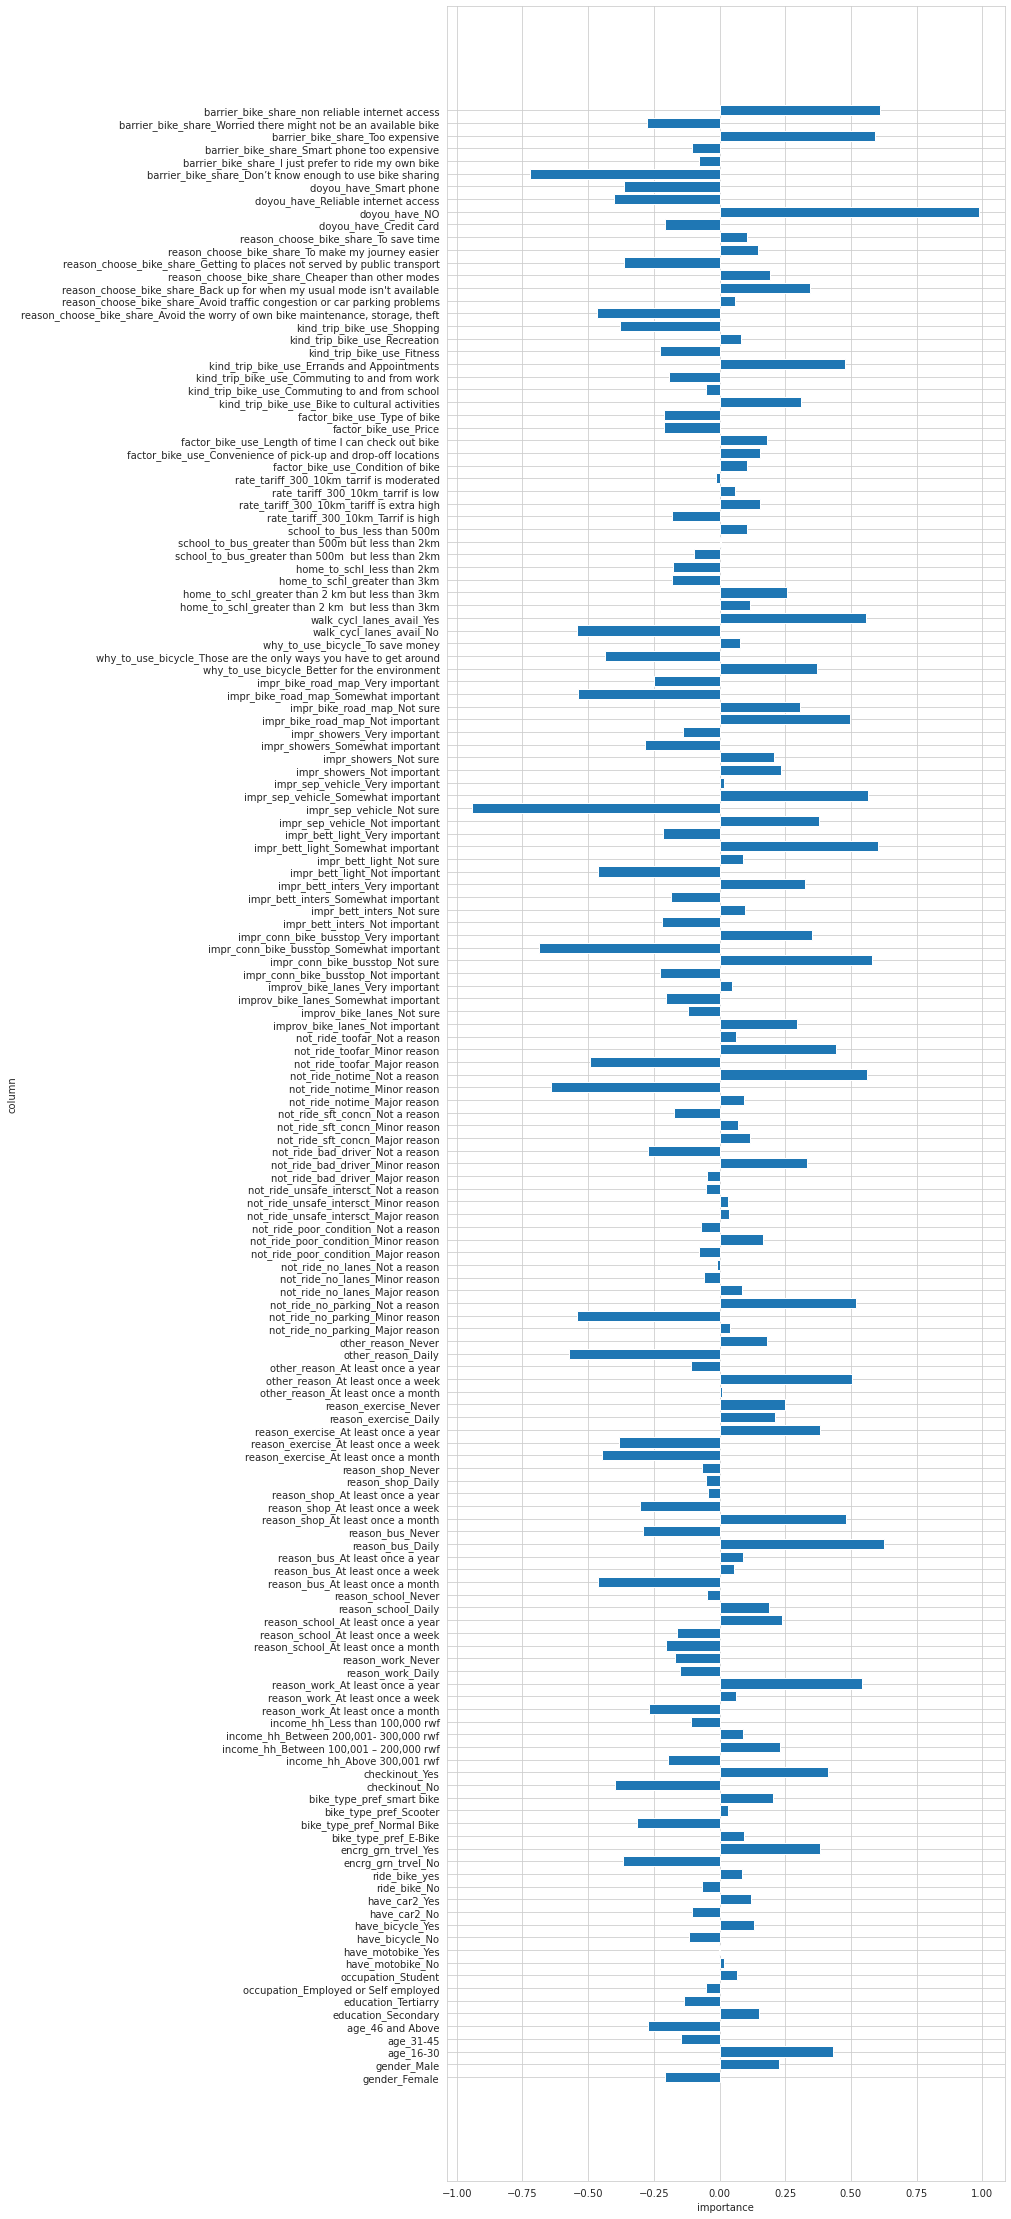

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,40))
plt.barh(feature_importances.features, feature_importances.feature_importance)
plt.xlabel('importance')
plt.ylabel('column')
display()

# *Binary logistic regression*

In [39]:
# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define the multinomial logistic regression model
log = LogisticRegression()
# fit the model on the whole dataset
log.fit(x_train, y_train)
from sklearn import metrics
y_pred=log.predict(x_test)
pred=log.predict(x_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy train:",metrics.accuracy_score(y_train, pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy train: 0.9691056910569106
Accuracy: 0.9185185185185185


In [40]:
# Feature Importance of logistic regression
from matplotlib import pyplot
importance = log.coef_[0]
odds=np.exp(importance)
# summarize feature importance
feature_importances=pd.DataFrame({'features':names_test,'feature_importance':importance,'odd ratio':odds})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance,odd ratio
136,kind_trip_bike_use_Commuting to and from school,1.129474,3.094028
55,other_reason_At least once a week,1.120465,3.066278
18,encrg_grn_trvel_Yes,1.095557,2.990847
115,ride_lanes_avail_cycle,0.926909,2.526688
137,kind_trip_bike_use_Commuting to and from work,0.822779,2.276819
...,...,...,...
88,impr_conn_bike_busstop_Not sure,-0.901511,0.405956
80,not_ride_toofar_Major reason,-0.929406,0.394788
17,encrg_grn_trvel_No,-1.095628,0.334330
140,kind_trip_bike_use_Recreation,-1.258907,0.283964


In [41]:
# Save submission file
feature_importances.to_csv('odds_ratio_bikesh.csv')
files.download('odds_ratio_bikesh.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

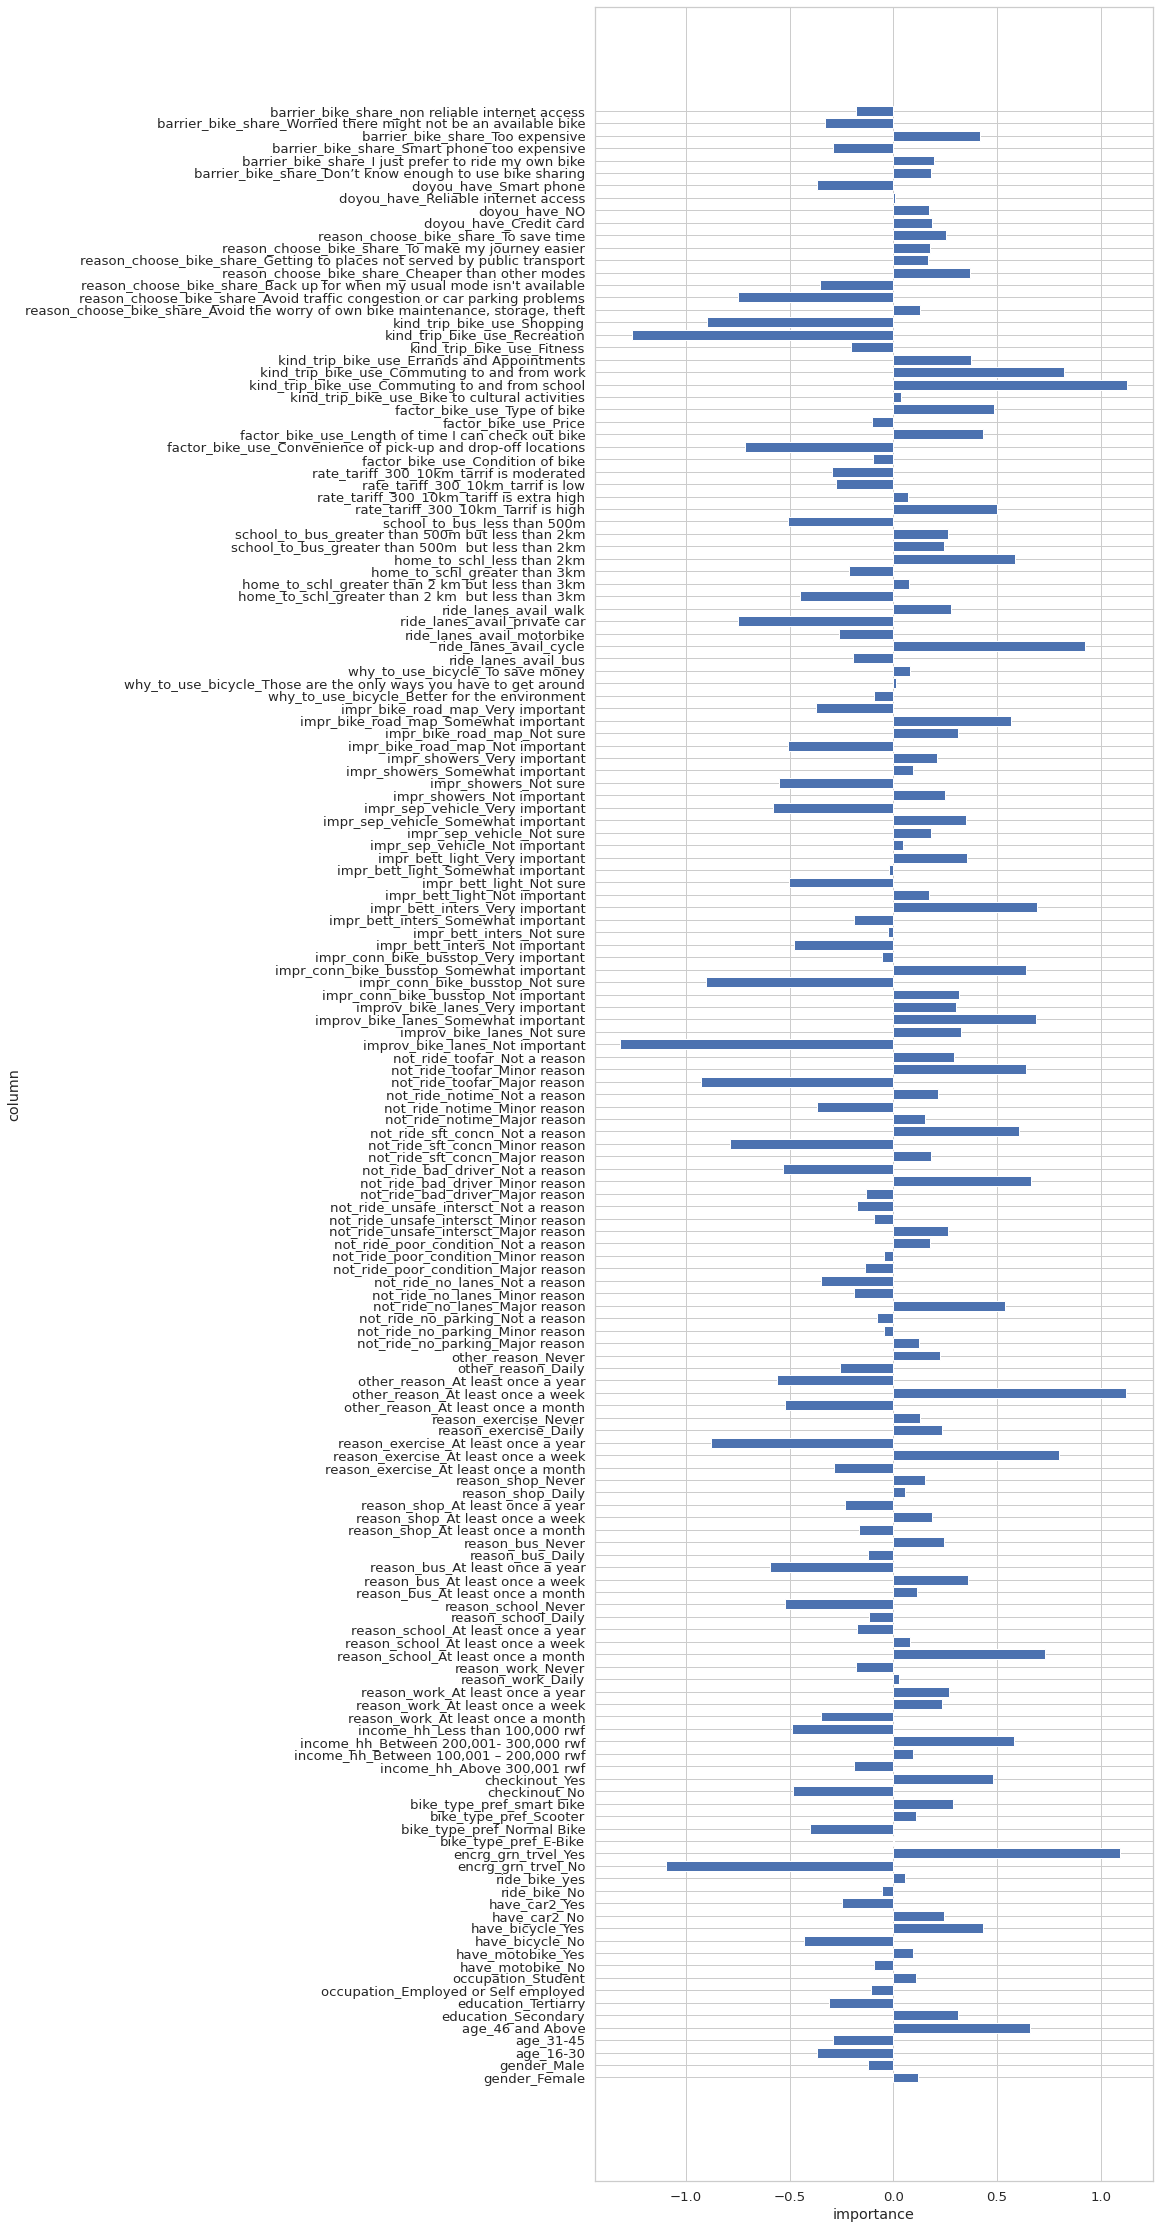

In [42]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,40))
plt.barh(feature_importances.features, feature_importances.feature_importance)
plt.xlabel('importance')
plt.ylabel('column')
display()

# *confusion Matrix*

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def summary_pred(model,x,y,thr):
    preds = (model.predict_proba(x)[:,1] >= thr).astype(int)

    
    acc = accuracy_score(y, preds)*100
    cm = confusion_matrix(y, preds)
    tn, fp, fn, tp = cm.ravel()
# plot confusion matrix as heatmap
    plt.figure(figsize=(5,3))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], 
                 yticklabels=['Negative', 'Positive'], cbar=False, cmap='Greens', 
                

                 linewidths=1, linecolor='black', fmt='.0f')
    plt.yticks(rotation=0)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    ax.xaxis.set_ticks_position('top') 
    plt.title('Confusion matrix')
    plt.show()
     #print('\performance metrics ----------------------')
    precision = tp/(tp+fp)*100
    recall = tp/(tp+fn)*100
    print('Accuracy: {}%'.format(acc))
    print('Precision: {}%'.format(precision))
    print('Recall: {}%'.format(recall))
    print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

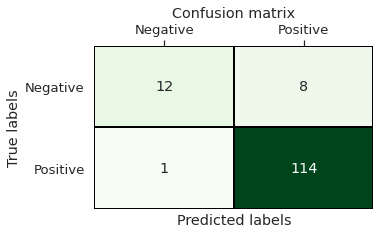

Accuracy: 93.33333333333333%
Precision: 93.44262295081968%
Recall: 99.1304347826087%
F1-score: 96.20253164556962


In [50]:
summary_pred(log,x_test,y_test,0.25)